# Data Analysis

In this section we will have a look at the difference in products between hedonic and utilitarian dirven products. We will see if we can find any patterns in the data from a descriptive level and then move on to a more inferential level.

In [1]:
# Installing packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk import bigrams
from wordcloud import WordCloud


In [2]:
# importing data
data_utilitarian1 = pd.read_csv ('/Users/paulahofmann/Library/CloudStorage/OneDrive-Persönlich/Uni/2. Lernpools Master/Masterarbeit/Coding/Online-Review/data_utilitarian.csv')

#data_utilitarian2 = pd.read_csv ('/Users/paulahofmann/Library/CloudStorage/OneDrive-Persönlich/Uni/2. Lernpools Master/Masterarbeit/Coding/Online-Review/data_utilitarian.csv')

In [3]:
data_utilitarian1.dropna(subset = ["text_cleaned1"], inplace=True)

# Functions for data analysis

In [4]:
# Function for showing the distribution of reviews by year

def plot_reviews_by_year(df):
    # Convert the timestamp column to datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    df['year'].hist(bins=len(df['year'].unique()), color='blue', alpha=0.5)
    plt.title('Distribution of Reviews by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Reviews')
    plt.grid(True)
    plt.show()


In [20]:
import matplotlib.pyplot as plt

def plot_avg_rating_by_year(df):
    # Convert the timestamp column to datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Group by year and calculate the average rating
    avg_rating_by_year = df.groupby('year')['rating'].mean()

    # Plot the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, color='blue', marker='o', linestyle='-')
    plt.title('Average Rating of Reviews by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.grid(True)
    plt.show()

# Example usage:
# plot_avg_rating_by_year(your_dataframe)


In [21]:
# Function for showing the amount on reviews by year

def plot_rating_counts_by_year(df):
    # Convert the timestamp column to datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Map ratings to categories (1 and 2 as negative, 3 as neutral, 4 and 5 as positive)
    rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
    df['rating_category'] = df['rating'].map(rating_categories)

    # Group by year and rating category, then count the occurrences
    rating_counts_by_year = df.groupby(['year', 'rating_category']).size().unstack(fill_value=0)

    # Plot the stacked bar plot
    plt.figure(figsize=(10, 6))
    rating_counts_by_year.plot(kind='bar', stacked=True, color=['red', 'grey', 'green'], alpha=0.7)
    plt.title('Rating Distribution by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Ratings')
    plt.legend(title='Rating Category', loc='upper left')
    plt.grid(True)
    plt.show()


In [7]:
# Showing sentiment distribution by year

def plot_sentiment_by_year(df):
    # Convert the timestamp column to datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Plot the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='text_sentiment', data=df, palette='Set2')
    plt.title('Distribution of Text Sentiment by Year')
    plt.xlabel('Year')
    plt.ylabel('Text Sentiment')
    plt.grid(True)
    plt.show()

# Example usage:
# plot_sentiment_by_year(your_dataframe)


In [13]:

def generate_wordcloud_reviews_by_sentiment(df):
    # Define rating categories
    rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Iterate over each sentiment category
    for ax, sentiment in zip(axes.flatten(), ['Negative', 'Neutral', 'Positive']):
        # Filter out reviews based on sentiment
        reviews = df[df['rating'].map(rating_categories) == sentiment]
        
        # Drop rows where 'text_cleaned1' column contains NaN values
        reviews.dropna(subset=['text_cleaned1'], inplace=True)
        
        # Concatenate the cleaned text of reviews
        text = ' '.join(reviews['text_cleaned1'])

        # Generate bigrams from the text
        bigram_list = list(bigrams(text.split()))

        # Create a WordCloud object with bigrams
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(dict(bigram_list))

        # Plot the WordCloud
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Word Cloud of {sentiment} Reviews (Bigrams)')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# generate_wordcloud_reviews_by_sentiment(data_utilitarian1)





## 1. Basic statistic

In [9]:
# Quick overlook of the data
print (data_utilitarian1.describe())

             rating  helpful_vote  text_sentiment  title_sentiment
count  11364.000000  11364.000000    11364.000000     11364.000000
mean       4.003960      2.656371        3.468937         3.580429
std        1.438609    111.472077        1.297648         1.182371
min        1.000000      0.000000        0.000000         0.000000
25%        3.000000      0.000000        4.000000         4.000000
50%        5.000000      0.000000        4.000000         4.000000
75%        5.000000      0.000000        4.000000         4.000000
max        5.000000   9766.000000        4.000000         4.000000


Number of reviews with at least one helpful rating: 496


<Figure size 1000x600 with 0 Axes>

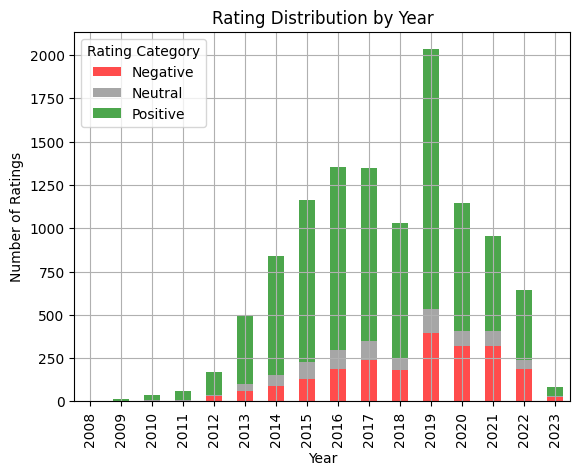

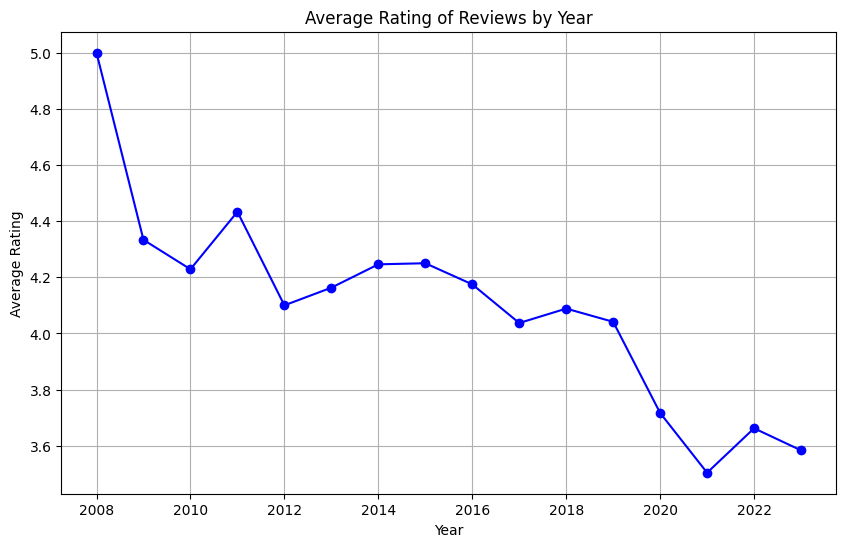

In [19]:
helpful_reviews_count = data_utilitarian1[data_utilitarian1['helpful_vote'] > 1].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

plot_rating_counts_by_year(data_utilitarian1)
plot_avg_rating_by_year(data_utilitarian1)

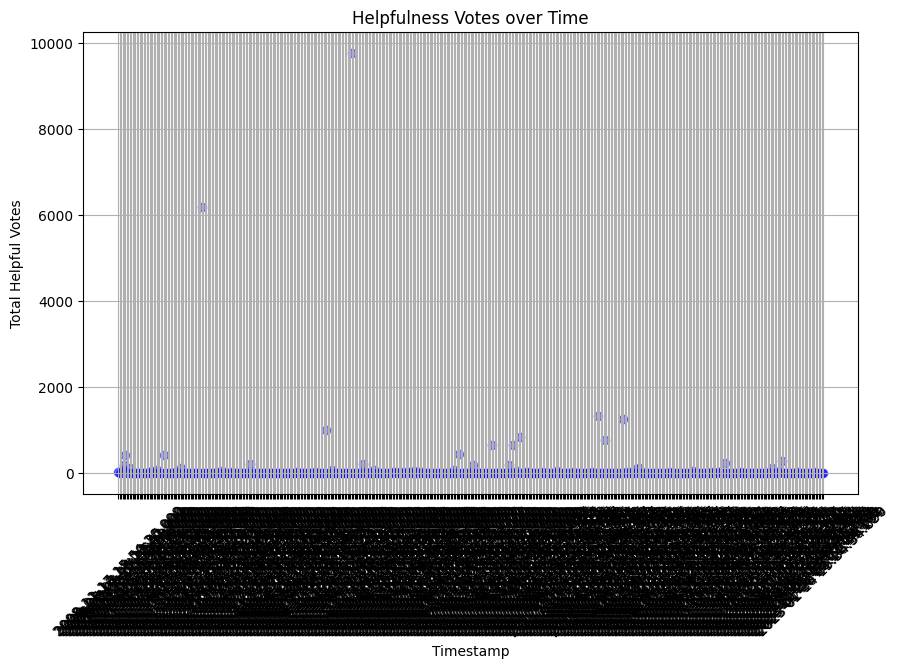

In [11]:
# Group by timestamp and calculate the sum of helpfulness votes
votes_by_timestamp = data_utilitarian1.groupby('timestamp')['helpful_vote'].sum()

votes_by_timestamp = votes_by_timestamp[votes_by_timestamp > 1]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(votes_by_timestamp.index, votes_by_timestamp, color='blue', alpha=0.5)
plt.title('Helpfulness Votes over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Helpful Votes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_14001/3821173631.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews.dropna(subset=['text_cleaned1'], inplace=True)


ValueError: could not convert string to float: 'zip'

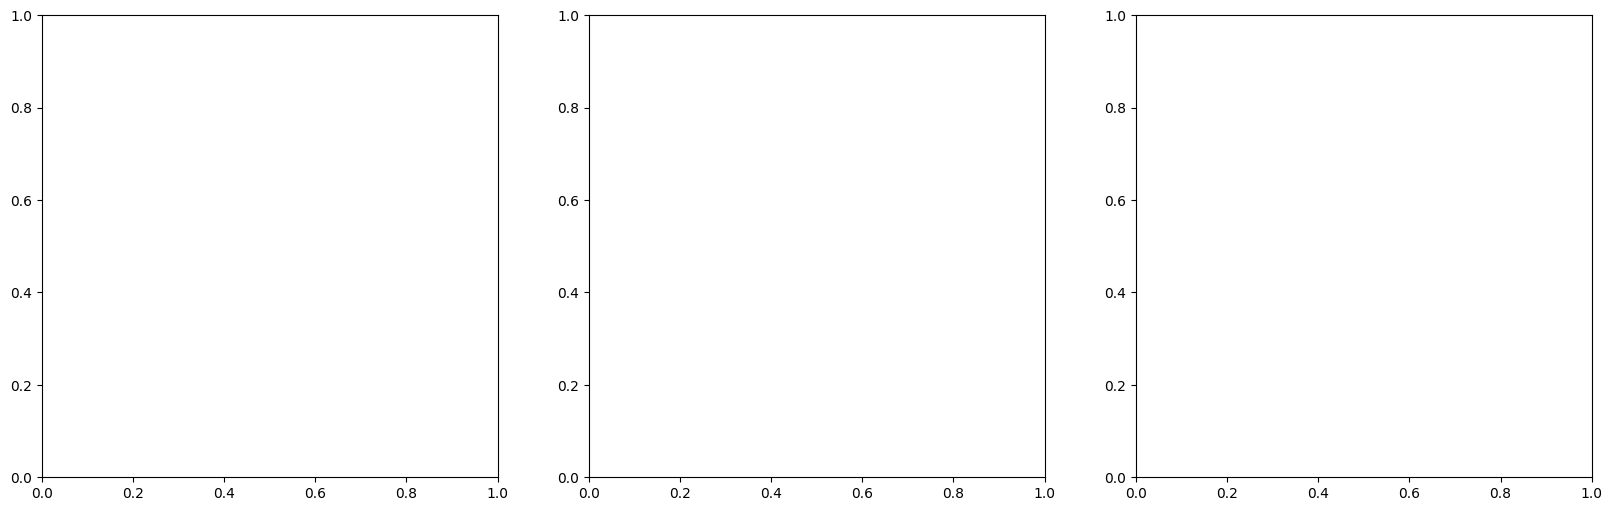

In [14]:
generate_wordcloud_reviews_by_sentiment (data_utilitarian1)